In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Parameters
N = 2                          # number of inputs
T = 10**4                      # time (number of training samples)
alpha_w = 10**(-6)             # learning rate for weights
x = np.array([[20,0],[0,20]])  # inputs have two patterns: one (0-20) and two (20-0)

# Init
y = np.zeros((T,1))              # output
w = 0.5*np.ones((T,N))           # weights

[20  0] [ 0 20]


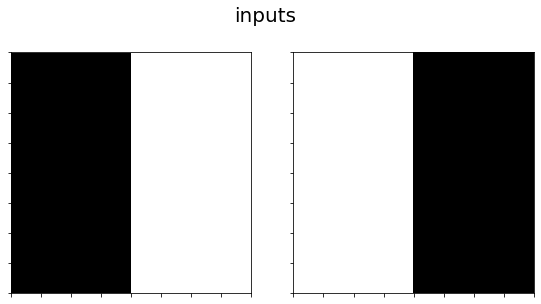

In [20]:
# Show example input pattern

print(x[:,0],x[:,1])
x1 = [x[:,0],x[:,0]]
x2 = [x[:,1],x[:,1]]

fig, axs = plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
fig.suptitle('inputs', fontsize=20)
axs[0].imshow(x1,cmap='binary')
axs[1].imshow(x2,cmap='binary')
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
plt.show()

## Oja's rule:

$ \Large y = \sum w_i x_i $ --> Linear output neuron

$ \Large\frac{dw}{dt} = \alpha ~ (xy - y^2w) $

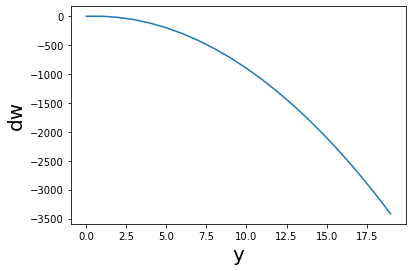

In [21]:
def update_weights_Oja(x,y,w):
    return x*y-w*y**2

x_ = 10
y_ = np.arange(20)
w_ = 10

dw = update_weights_Oja(x_,y_,w_)
plt.plot(y_,dw)
plt.ylabel('dw',fontsize=20)
plt.xlabel('y',fontsize=20)
plt.show()

In [22]:
# Apply BCM rule
for t in range(T-1):
    p = np.random.randint(0,2)                                               # presentation of pattern 0 or 1 randomly
    y[t] = np.dot(w[t,:],x[p,:])                                             # compute the output
    delta_w = alpha_w*update_weights_Oja(x[p,:],y[t],w[t,:])
    #delta_w = alpha_w*(x[p,:]*y[t] - w[t,:]*y[t]**2)
    w[t+1,:] = w[t,:] + delta_w                  # update of the weights    

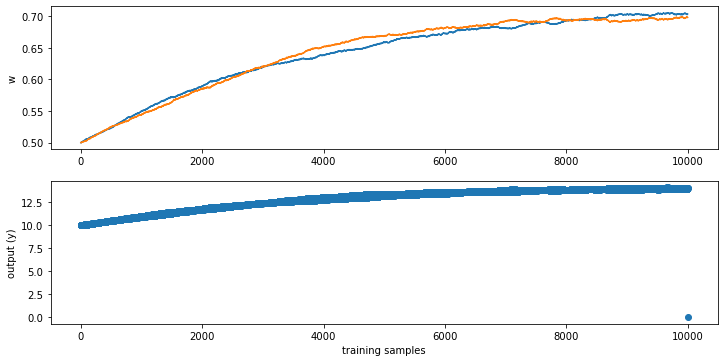

In [23]:
%matplotlib inline

fig, axs = plt.subplots(2,figsize=(10,5))
fig.tight_layout()
axs[0].plot(w)
axs[0].set(ylabel='w')
axs[1].scatter(np.arange(len(y)),y) 
axs[1].set(ylabel='output (y)',xlabel='training samples')
plt.show()

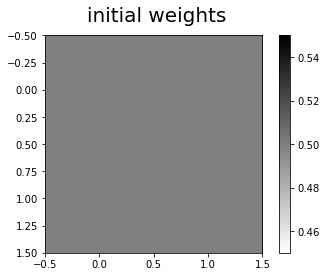

initial weights: [0.5 0.5]


In [24]:
plt.suptitle('initial weights', fontsize=20)
plt.imshow([w[0,:],w[0,:]],cmap='binary')
plt.colorbar()
plt.show()

print('initial weights:', w[0,:])

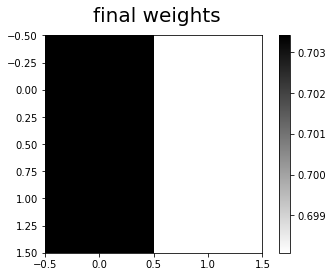

final weights: [0.70340856 0.69808437]


In [25]:
plt.suptitle('final weights', fontsize=20)
plt.imshow([w[-1,:],w[-1,:]],cmap='binary')
plt.colorbar()
plt.show()

print('final weights:',w[-1,:])